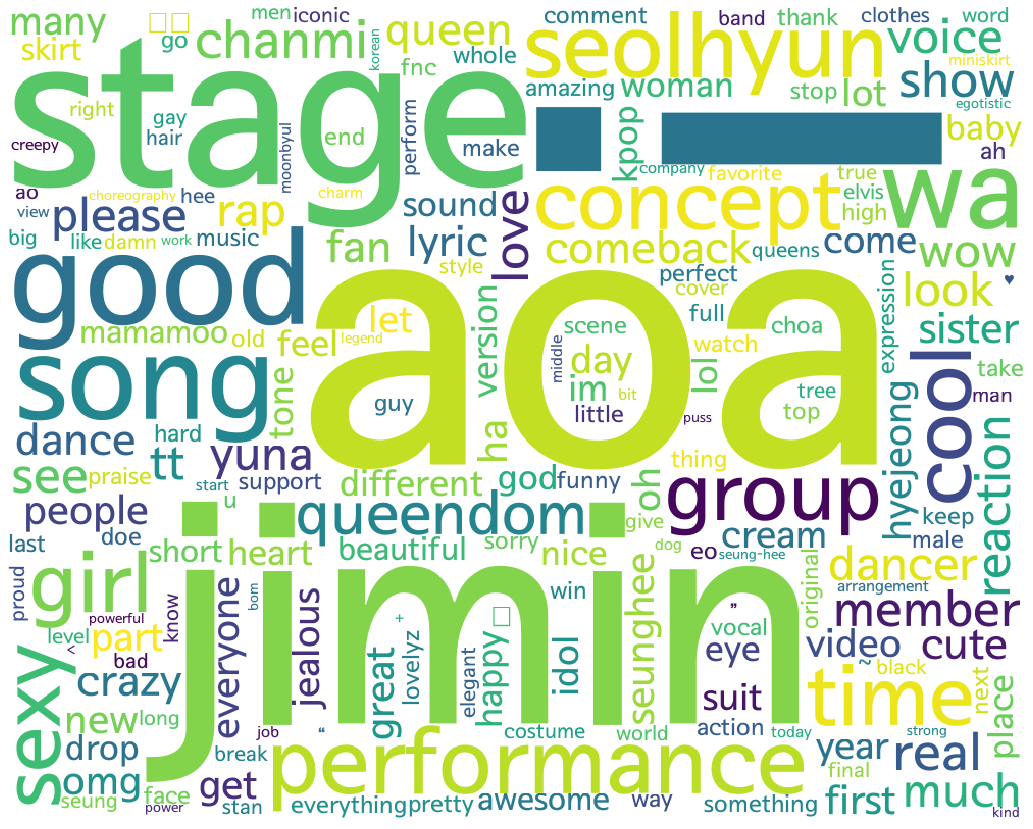

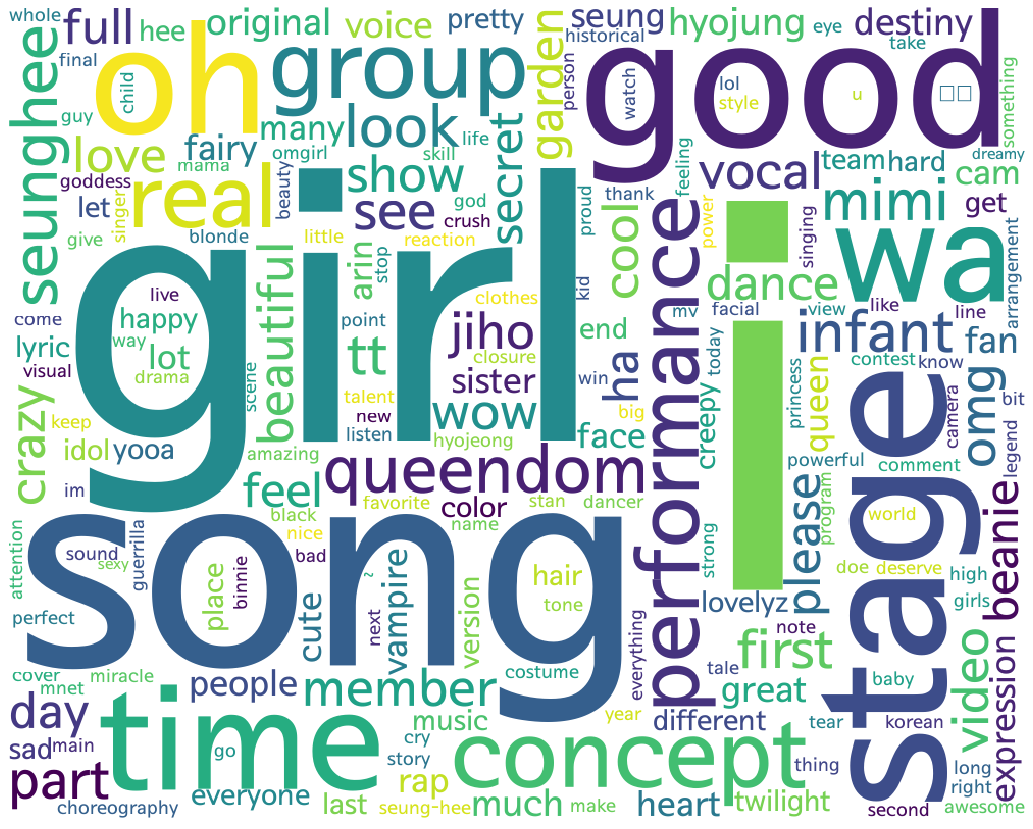

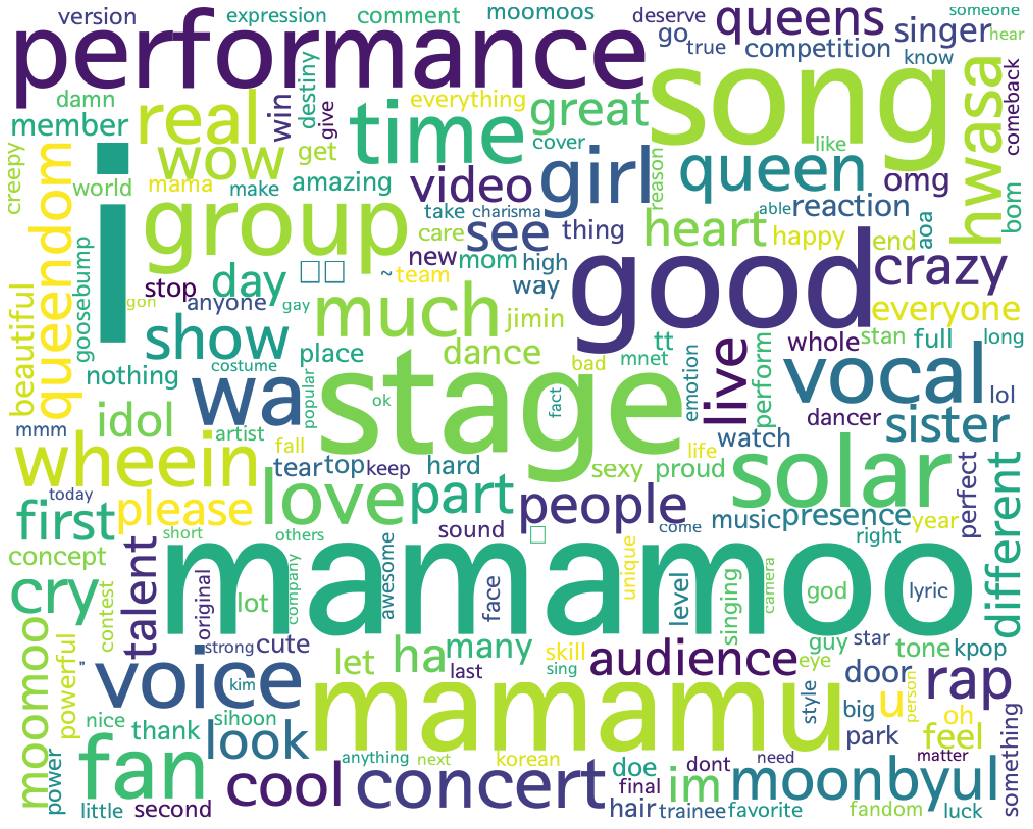

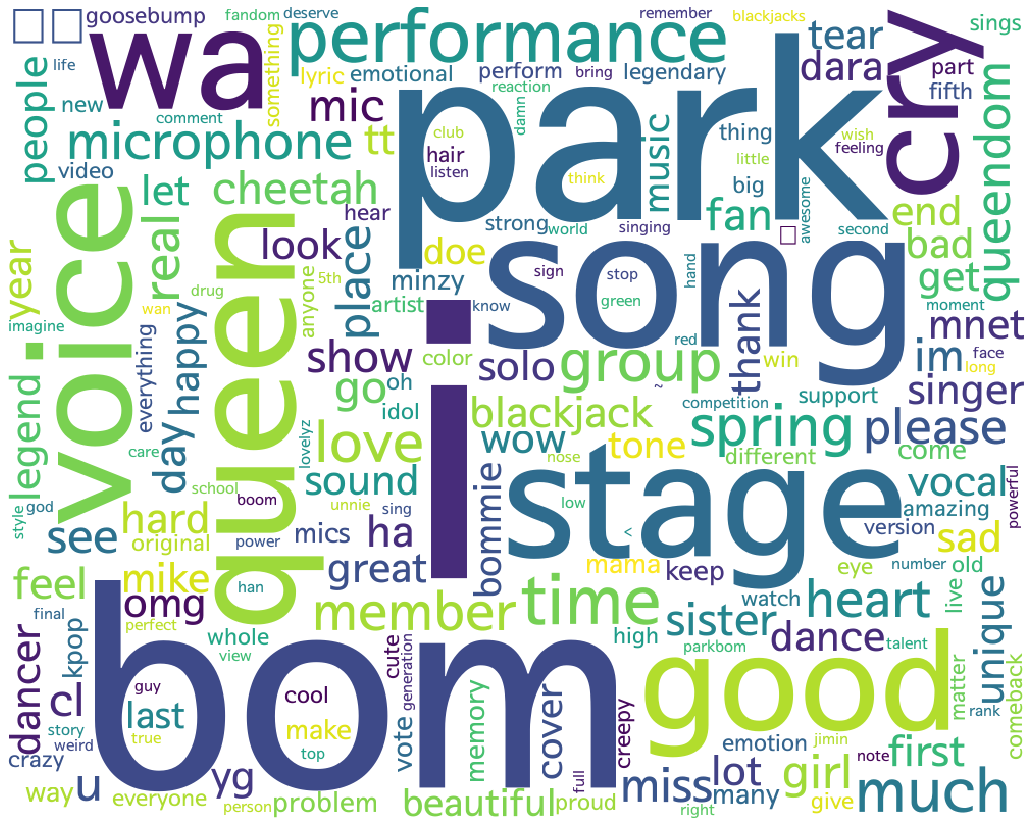

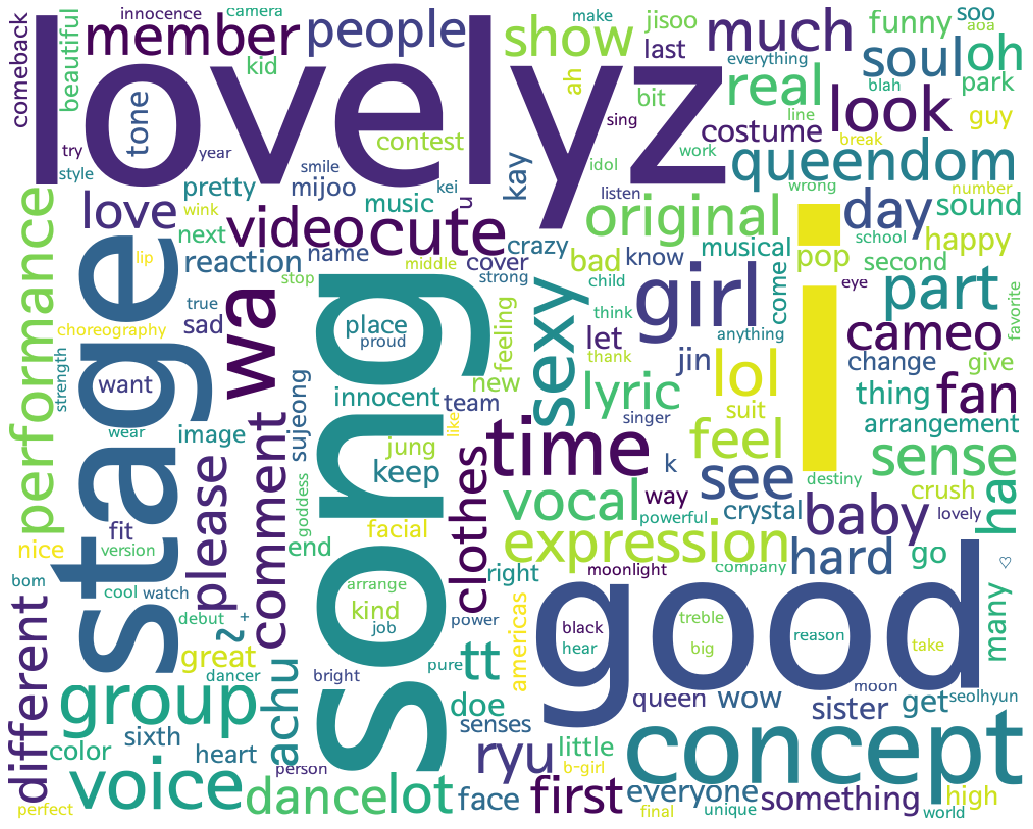

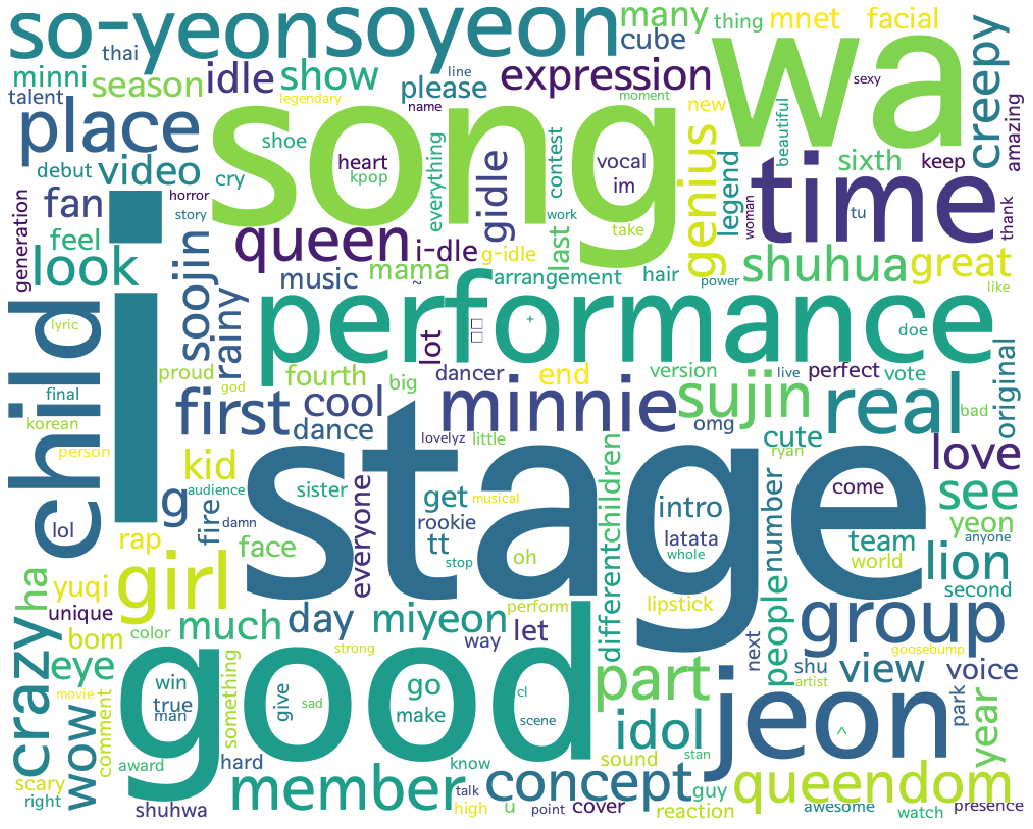

In [1]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud


for artist in ["AOA","오마이걸","마마무","박봄","러블리즈","아이들"]:
    f_eng = open("data/english_comments/english_comments_{}.txt".format(artist), "r" , encoding="utf-8")
    f_ko_to_eng = open("data/ko_to_eng_comments/ko_to_eng_{}.txt".format(artist), "r" , encoding="utf-8")
    f_eng_text = f_eng.read()
    f_ko_to_eng_text = f_ko_to_eng.read()
    f_eng.close()
    f_ko_to_eng.close()
    merged_text = f_ko_to_eng_text + f_eng_text
    #f_merged = open("data/merged_eng_comments/merged_eng_comments_{}.txt".format(artist), "w+", encoding = "utf-8")
    #f_merged.write(merged_text)
    tokens = nltk.word_tokenize(merged_text)
    lemma = nltk.wordnet.WordNetLemmatizer()
    comments_lemma = []
    for token in tokens:
        comments_lemma.append(lemma.lemmatize(token))

    stop_words = set(stopwords.words('english'))
    stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', '=',"i","'s",'...',"'m","n't","..","ㅋ","ㅋㅋ","ㅋㅋㅋ","ㅠ","ㅠㅠ","ㅠㅠㅠ","the","’"]) 
    filtered_words = [word.lower() for word in comments_lemma if word not in stop_words]
    filtered_words_tagged = nltk.pos_tag(filtered_words)
    filtered_nouns =[]

    for word, tagger in filtered_words_tagged:
        if tagger in ['NN','NNS','NNP','NNPS',"VB","JJ"]:
            filtered_nouns.append(word)
    
    nouns_counted = Counter(filtered_nouns)
    
    cloud = WordCloud(width=1000, height=800, 
                  font_path='08서울남산체 B.ttf', 
                  background_color='white')

    cloud = cloud.fit_words(nouns_counted) 

    plt.figure(figsize=(20, 15))
    plt.axis('off') 
    plt.imshow(cloud)
    plt.savefig("data/wordclouds/merged_english_comments_wordcloud_{}.png".format(artist))